In [34]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

In [35]:
def accuracy_report(y_true, y_pred, make_plot=True):
    print('MSE: {:.3f}'.format(mse(y_true, y_pred)))
    print('RMSE: {:.3f}'.format(np.sqrt(mse(y_true, y_pred))))
    print('MAE: {:.3f}'.format(mae(y_true, y_pred)))
    if make_plot:
        plt.figure(figsize=(8,6))
        plt.scatter(y_true, y_pred)
        plt.xlabel('Reality')
        plt.ylabel('Prediction')
        plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')

In [36]:
df = pd.read_csv("C:\\Users\\Lenar\\PycharmProjects\\python-parser-cian\\data.csv")
df["Price_per_meters"] = df["Price_per_month"]/(df["Square_meters"].astype(float))
df["Author"] = (df["Author"].astype(str))

df.head()

,Author,Link,How_many_rooms,Square_meters,Street,All_floors,Commissions %,Price_per_month,Floor,Price_per_meters
0,ID 305100,https://kazan.cian.ru/rent/flat/237818882/,4,186,Sibgata Hakima,16,50,100000,9,537.634409
1,ID 305100,https://kazan.cian.ru/rent/flat/244424052/,2,62,Sibgata Hakima,18,50,30000,12,483.870968
2,ID 305100,https://kazan.cian.ru/rent/flat/243318735/,2,75,Dostoevskogo,12,50,30000,5,400.000000
3,ID 305100,https://kazan.cian.ru/rent/flat/236848944/,3,110,Tovarischeskaja,9,50,50000,5,454.545455
4,ID 305100,https://kazan.cian.ru/rent/flat/246525819/,2,65,Bol'shaja Krasnaja,5,50,30000,2,461.538462


### Отбросим некоторые признаки

In [37]:
del df['Link']
del df['Commissions %']
del df['Street']
del df['Price_per_month']

df.head()

,Author,How_many_rooms,Square_meters,All_floors,Floor,Price_per_meters
0,ID 305100,4,186,16,9,537.634409
1,ID 305100,2,62,18,12,483.870968
2,ID 305100,2,75,12,5,400.000000
3,ID 305100,3,110,9,5,454.545455
4,ID 305100,2,65,5,2,461.538462


### Преобразуем нечисловые признаки в числовые

In [38]:
enc = LabelEncoder()
df.iloc[:,0] = enc.fit_transform(df.iloc[:,0])

df.head()

,Author,How_many_rooms,Square_meters,All_floors,Floor,Price_per_meters
0,54,4,186,16,9,537.634409
1,54,2,62,18,12,483.870968
2,54,2,75,12,5,400.000000
3,54,3,110,9,5,454.545455
4,54,2,65,5,2,461.538462


### Построим гистаграмму распределения объявлений

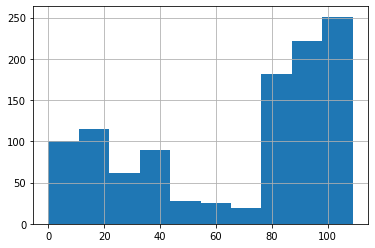

In [39]:
df['Author'].hist()

#### Видно, что довольно много людей имеют по несколько сотен объявлений (от 150 и более)

### Применим линейную модель

MSE: 9273.075
RMSE: 96.297
MAE: 70.460


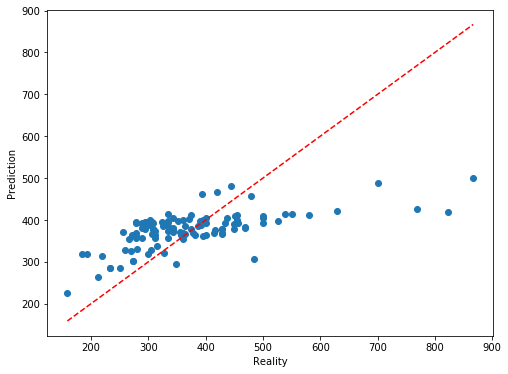

In [40]:
train_data, test_data, train_labels, test_labels = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size = 0.1, random_state=0)

model = LinearRegression()
model.fit(X=train_data, y=train_labels)

accuracy_report(test_labels, model.predict(test_data))


### Также применим линейную модель, но предварительно удалив ещё один признак

In [41]:
df2 = df.copy()
df2.head()

,Author,How_many_rooms,Square_meters,All_floors,Floor,Price_per_meters
0,54,4,186,16,9,537.634409
1,54,2,62,18,12,483.870968
2,54,2,75,12,5,400.000000
3,54,3,110,9,5,454.545455
4,54,2,65,5,2,461.538462


In [42]:
del df2['Author']

df2.head()

,How_many_rooms,Square_meters,All_floors,Floor,Price_per_meters
0,4,186,16,9,537.634409
1,2,62,18,12,483.870968
2,2,75,12,5,400.000000
3,3,110,9,5,454.545455
4,2,65,5,2,461.538462


MSE: 9428.346
RMSE: 97.100
MAE: 72.011


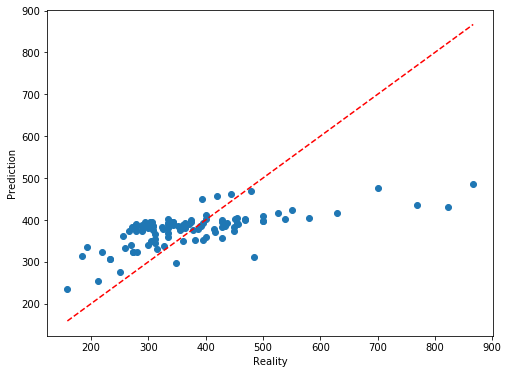

In [43]:
train_data, test_data, train_labels, test_labels = train_test_split(df2.iloc[:, :-1], df2.iloc[:, -1], test_size = 0.1, random_state=0)
model = LinearRegression()
model.fit(X=train_data, y=train_labels)

accuracy_report(test_labels, model.predict(test_data))
